In [1]:
# !py -m pip install --user numpy
# !py -m pip install pandas
# !py -m pip install -U matplotlib
# !py -m pip install -U scikit-image
# !py -m pip install -U scikit-learn
# !py -m pip install keras
# !py -m pip install tensorflow

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.morphology import binary_opening, disk, label

In [3]:
base_directory = ""
train_directory = os.listdir(base_directory + "/data/train/")
test_directory = os.listdir(base_directory + "/data/test/")

In [4]:
train_ship_seg = pd.read_csv(os.path.join(base_directory, 'train_ship_segmentations_v2.csv'))
train_ship_seg.head(10)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...
8,0001b1832.jpg,NaN
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...


In [5]:
print(f"Total number of images:{train_ship_seg['ImageId'].nunique()}")
not_empty_images = pd.notna(train_ship_seg['EncodedPixels'])
print(f"Number of not empty images:{train_ship_seg[not_empty_images]['ImageId'].nunique()}")
print(f"Total number of ships on images:{not_empty_images.sum()}")
print(f"Total number of empty images:{(~not_empty_images).sum()}")

Total number of images:192556
Number of not empty images:42556
Total number of ships on images:81723
Total number of empty images:150000


In [6]:
train_ship_seg['Ships'] = train_ship_seg['EncodedPixels'].map(lambda row: 1 if isinstance(row, str) else 0)
unique_images = train_ship_seg.groupby('ImageId').agg({'Ships': 'sum'}).reset_index()
print(unique_images.loc[unique_images['Ships']>2].head())


           ImageId  Ships
3    000194a2d.jpg      5
5    00021ddc3.jpg      9
45   00113a75c.jpg      7
81   001aee007.jpg      4
117  002943412.jpg      3


Max ships :  15
Avarage ships :  0.4244115997424126


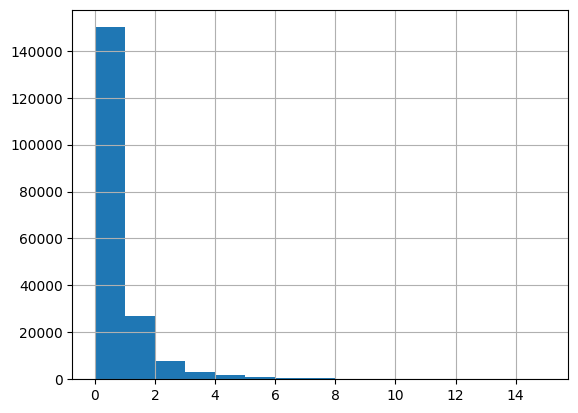

In [8]:
unique_images['Ships'].hist(bins=unique_images['Ships'].max())
print('Max ships : ',unique_images['Ships'].max())
print('Avarage ships : ',unique_images['Ships'].mean())

18278 masks


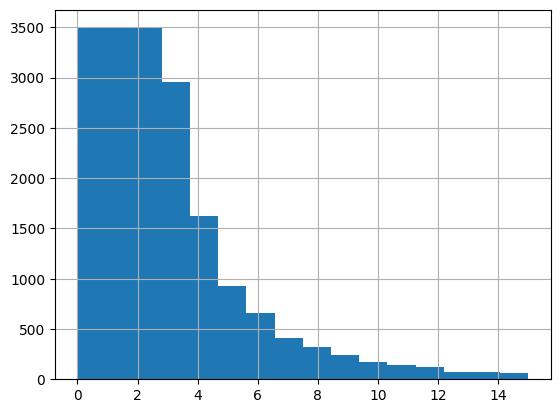

In [9]:
balanced_data = unique_images.groupby('Ships').apply(lambda x: x.sample(3500) if len(x) > 3500 else x)
balanced_data['Ships'].hist(bins=balanced_data['Ships'].max()+1)
print(balanced_data.shape[0], 'masks')